# Posterior entropy

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np

import darc
from darc.delayed import models
from darc.designs import DARCDesign, Griskevicius2011delay, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
true_params = pd.DataFrame.from_dict({'logk': [np.log(0.04)], 'α': [2]})

## track entropy
To tell our `simulated_experiment_trial_loop` what we want to track, we are going to provide an argument which is a dictionary. The keys are the parameter names and the values are the corresponding scipy distributions.

In [4]:
# from scipy.stats import norm

# track_this = {'logk': norm}

## run a simulated experiment

In [9]:
design_thing = DARCDesign(max_trials=40, 
                         RA=list(np.arange(5, 99+1, 1)), 
                         DB=list(np.arange(1, 365, 7)))

model = models.Hyperbolic(n_particles=5000)
model.θ_true = true_params

fitted_model, summary_stats = simulated_experiment_trial_loop(design_thing, model)

In [12]:
summary_stats.head()

,logk_entropy,logk_median,logk_mean,logk_lower50,logk_upper50,logk_lower95,logk_upper95
0,1.409997,-5.911195,-5.901201,-6.585705,-5.233709,-7.815802,-4.005813
1,0.903343,-5.051403,-4.951443,-5.368860,-4.613116,-5.757134,-3.568939
2,0.696918,-4.624570,-4.548706,-4.924245,-4.291793,-5.148118,-3.320139
3,0.561438,-4.292787,-4.195792,-4.507049,-3.970242,-4.702704,-3.129025
4,0.474111,-3.644581,-3.581183,-3.820773,-3.394226,-4.340610,-2.628481


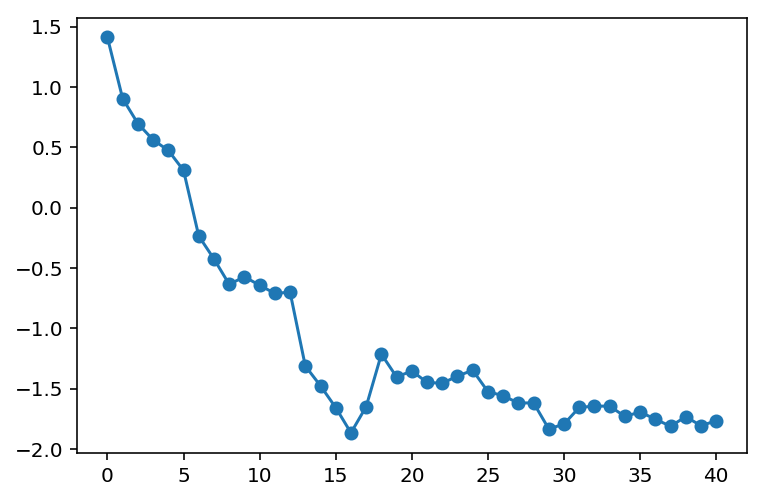

In [11]:
plt.plot(summary_stats['logk_entropy'], '-o')